In [1]:
import pandas as pd
import src.utils as utils

## Read config

## Load the data

In [2]:

data = utils.load_data('data/training.csv')
#data = data.drop(['patient_id'],axis=1)

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Preprocessing

In [4]:
import src.data_preprocessing as prep
    
X_train, X_test, y_train, y_test = prep.split_data(data)

df_nulls=pd.DataFrame()

df_nulls['num_nulls'] = X_train.isnull().sum() 
df_nulls['total'] = len(X_train)
df_nulls['null_percentage'] = df_nulls['num_nulls'] / df_nulls['total']

df_nulls

,num_nulls,total,null_percentage
patient_id,0,10324,0.000000
patient_race,5104,10324,0.494382
payer_type,1434,10324,0.138900
patient_state,42,10324,0.004068
patient_zip3,0,10324,0.000000
patient_age,0,10324,0.000000
patient_gender,0,10324,0.000000
bmi,7144,10324,0.691980
breast_cancer_diagnosis_code,0,10324,0.000000
breast_cancer_diagnosis_desc,0,10324,0.000000


In [5]:
region_features = [
       'population', 'density', 'age_median', 'age_under_10', 'age_10_to_19',
       'age_20s', 'age_30s', 'age_40s', 'age_50s', 'age_60s', 'age_70s',
       'age_over_80', 'male', 'female', 'married', 'divorced', 'never_married',
       'widowed', 'family_size', 'family_dual_income',
       'income_household_median', 'income_household_under_5',
       'income_household_5_to_10', 'income_household_10_to_15',
       'income_household_15_to_20', 'income_household_20_to_25',
       'income_household_25_to_35', 'income_household_35_to_50',
       'income_household_50_to_75', 'income_household_75_to_100',
       'income_household_100_to_150', 'income_household_150_over',
       'income_household_six_figure', 'income_individual_median',
       'home_ownership', 'housing_units', 'home_value', 'rent_median',
       'rent_burden', 'education_less_highschool', 'education_highschool',
       'education_some_college', 'education_bachelors', 'education_graduate',
       'education_college_or_above', 'education_stem_degree',
       'labor_force_participation', 'unemployment_rate', 'self_employed',
       'farmer', 'race_white', 'race_black', 'race_asian', 'race_native',
       'race_pacific', 'race_other', 'race_multiple', 'hispanic', 'disabled',
       'poverty', 'limited_english', 'commute_time', 'health_uninsured',
       'veteran', 'Ozone', 'PM25', 'N02']
X_train_filled = prep.fill_null_for_other_regional_information(X_train, ['patient_state'], region_features, fill_strategy='mean', is_traing=True)
X_train_filled = prep.fill_null_for_division_and_region(X_train_filled, is_traing=True)
X_train_filled = prep.fill_gender(X_train_filled)
X_train_filled = prep.fill_null_for_environmental(X_train_filled, ['Division'], ['Ozone', 'PM25', 'N02'], fill_strategy='mean', is_traing=True)
X_train_filled = prep.fill_null_for_payer_type(X_train_filled, col='payer_type', is_traing=True)
X_train_filled = prep.fill_null_for_bmi(X_train_filled, col='bmi', fill_strategy='mean', is_traing=True)
X_train_filled = prep.fill_null_with_seperate_category(X_train_filled, columns = ['patient_race', 'metastatic_first_novel_treatment', 'metastatic_first_novel_treatment_type'])


df_nulls=pd.DataFrame()

df_nulls['num_nulls'] = X_train_filled.isnull().sum() 
df_nulls['total'] = len(X_train_filled)
df_nulls['null_percentage'] = df_nulls['num_nulls'] / df_nulls['total']

df_nulls

,num_nulls,total,null_percentage
patient_id,0,10324,0.0
patient_race,0,10324,0.0
payer_type,0,10324,0.0
patient_state,0,10324,0.0
patient_zip3,0,10324,0.0
patient_age,0,10324,0.0
patient_gender,0,10324,0.0
bmi,0,10324,0.0
breast_cancer_diagnosis_code,0,10324,0.0
breast_cancer_diagnosis_desc,0,10324,0.0


In [6]:
X_test.head()

,patient_id,patient_race,payer_type,patient_state,patient_zip3,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,metastatic_cancer_diagnosis_code,metastatic_first_novel_treatment,metastatic_first_novel_treatment_type,Region,Division,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,housing_units,home_value,rent_median,rent_burden,education_less_highschool,education_highschool,education_some_college,education_bachelors,education_graduate,education_college_or_above,education_stem_degree,labor_force_participation,unemployment_rate,self_employed,farmer,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02
11970,241293,NaN,COMMERCIAL,IL,605,51,F,NaN,C50919,Malignant neoplasm of unsp site of unspecified...,C773,NaN,NaN,Midwest,East North Central,18511.321430,782.646429,40.369643,12.830357,13.101786,10.857143,13.235714,12.910714,15.392857,11.835714,6.444643,3.382143,51.033929,48.966071,56.042857,9.898214,29.285714,4.760714,3.233818,58.841818,99988.01852,2.054545,1.116364,1.745455,2.160000,2.107273,5.161818,7.594545,17.076364,14.192727,20.567273,26.212727,46.780000,47189.43636,78.890909,6653.946429,300143.6923,1347.901961,27.781250,7.178571,24.328571,27.825000,24.555357,16.108929,40.664286,40.880357,67.121429,4.492857,12.413208,1.464151,79.142857,5.546429,6.035714,0.210714,0.010714,3.669643,5.380357,13.935714,8.660714,7.101786,2.507273,33.132075,5.412500,5.078571,36.974870,7.893858,21.718229
8868,612155,Black,MEDICAID,GA,300,56,F,NaN,C50211,Malig neoplm of upper-inner quadrant of right ...,C773,NaN,NaN,South,South Atlantic,40162.725810,875.119355,37.734426,13.421311,14.393443,12.029508,13.813115,14.032787,14.036066,10.106557,5.449180,2.726230,48.536066,51.463934,49.665574,12.496721,33.529508,4.313115,3.380984,57.214754,82017.54098,2.296721,1.567213,3.014754,3.300000,3.283607,7.906557,11.395082,16.332787,13.537705,17.293443,20.083607,37.377049,39698.46667,67.514754,14135.629030,276631.6949,1339.316667,31.643860,10.380328,21.544262,27.100000,24.840984,16.137705,40.978689,43.401667,67.077049,5.044262,16.516667,0.311667,49.021311,32.513115,7.944262,0.263934,0.073770,4.603279,5.578689,11.842623,10.270492,10.775410,4.304918,32.501667,13.040984,6.503279,40.968089,9.488443,19.108904
4659,945034,White,COMMERCIAL,OR,974,53,F,29.0,C50312,Malig neoplasm of lower-inner quadrant of left...,C7989,NaN,NaN,West,Pacific,7573.884615,100.082051,49.551316,8.605128,10.474359,10.224359,9.816667,10.525641,12.950000,18.552564,12.216667,6.634615,50.034615,49.965385,51.441026,15.062821,25.384615,8.110256,2.881316,39.459211,56858.01351,3.078205,2.271795,4.215385,6.379487,6.038462,10.671795,15.144872,18.924359,10.971795,13.637179,8.696154,22.333333,27739.06579,73.965385,3154.448718,280274.0769,958.107692,31.365574,8.744156,30.759740,39.651948,13.392208,7.457143,20.849351,46.381081,48.905128,7.998701,11.063514,3.082432,89.260256,0.394872,1.156410,1.397436,0.067949,1.900000,5.812821,5.938462,22.233333,15.133333,0.384615,25.986486,6.661538,11.862821,37.676078,4.211750,6.512334
8506,376741,Asian,NaN,CA,907,45,F,23.0,1749,"Malignant neoplasm of breast (female), unspeci...",C773,NaN,NaN,West,Pacific,28996.772730,2757.963636,40.640909,9.868182,15.304545,13.140909,12.181818,11.463636,14.150000,12.518182,7.136364,4.227273,47.631818,52.368182,44.472727,11.386364,38.240909,5.890909,3.460476,55.709

In [7]:
X_test_filled = prep.fill_null_for_other_regional_information(X_test, ['patient_state'], region_features, fill_strategy='mean', is_traing=False)
X_test_filled = prep.fill_null_for_division_and_region(X_test_filled, is_traing=False)
X_test_filled = prep.fill_gender(X_test_filled)
X_test_filled = prep.fill_null_for_environmental(X_test_filled, ['Division'], ['Ozone', 'PM25', 'N02'], fill_strategy='mean', is_traing=False)
X_test_filled = prep.fill_null_for_payer_type(X_test_filled, col='payer_type', is_traing=False)
X_test_filled = prep.fill_null_for_bmi(X_test_filled, col='bmi', fill_strategy='mean', is_traing=False)
X_test_filled = prep.fill_null_with_seperate_category(X_test_filled, columns = ['patient_race', 'metastatic_first_novel_treatment', 'metastatic_first_novel_treatment_type'])

df_nulls=pd.DataFrame()

df_nulls['num_nulls'] = X_train_filled.isnull().sum() 
df_nulls['total'] = len(X_train_filled)
df_nulls['null_percentage'] = df_nulls['num_nulls'] / df_nulls['total']

df_nulls

,num_nulls,total,null_percentage
patient_id,0,10324,0.0
patient_race,0,10324,0.0
payer_type,0,10324,0.0
patient_state,0,10324,0.0
patient_zip3,0,10324,0.0
patient_age,0,10324,0.0
patient_gender,0,10324,0.0
bmi,0,10324,0.0
breast_cancer_diagnosis_code,0,10324,0.0
breast_cancer_diagnosis_desc,0,10324,0.0


In [8]:
X_train_filled.columns

X_train_filled = X_train_filled.drop(['patient_id', 'patient_gender'],axis=1)
X_test_filled = X_test_filled.drop(['patient_id', 'patient_gender'],axis=1)

## Training

In [10]:
from catboost import CatBoostClassifier

cat_features = X_train_filled.select_dtypes(include=['object', 'category']).columns
num_features = X_train_filled.select_dtypes(include=['float64', 'int64']).columns

cat_model = CatBoostClassifier(
    #custom_loss=["AUC"],
    cat_features=cat_features.values,
    use_best_model=True,
    random_state=42,
    verbose=100,    
)
cat_model.fit(X_train_filled, y_train, eval_set=(X_test_filled, y_test))

Learning rate set to 0.056407
0:	learn: 0.6667695	test: 0.6660996	best: 0.6660996 (0)	total: 70.6ms	remaining: 1m 10s
100:	learn: 0.4484247	test: 0.4642032	best: 0.4638742 (63)	total: 1.4s	remaining: 12.5s
200:	learn: 0.4263036	test: 0.4645863	best: 0.4638742 (63)	total: 2.77s	remaining: 11s
300:	learn: 0.4044070	test: 0.4661669	best: 0.4638742 (63)	total: 4.16s	remaining: 9.67s
400:	learn: 0.3867884	test: 0.4677695	best: 0.4638742 (63)	total: 5.54s	remaining: 8.27s
500:	learn: 0.3713536	test: 0.4690805	best: 0.4638742 (63)	total: 6.89s	remaining: 6.87s
600:	learn: 0.3567649	test: 0.4720004	best: 0.4638742 (63)	total: 8.25s	remaining: 5.48s
700:	learn: 0.3433118	test: 0.4733680	best: 0.4638742 (63)	total: 9.61s	remaining: 4.1s
800:	learn: 0.3314535	test: 0.4751636	best: 0.4638742 (63)	total: 11s	remaining: 2.74s
900:	learn: 0.3193852	test: 0.4770647	best: 0.4638742 (63)	total: 12.4s	remaining: 1.36s
999:	learn: 0.3093885	test: 0.4789557	best: 0.4638742 (63)	total: 13.7s	remaining: 0us


In [11]:
y_pred = cat_model.predict(X_test_filled)
y_pred

array([1, 1, 1, ..., 0, 1, 0])

## Evaluation

In [12]:
import src.evaluation as eval

model_eval = pd.DataFrame.from_dict(eval.evaluate_model(y_test,y_pred), orient='index')
model_eval

,0
Accuracy,0.817196
Precision,0.790757
Recall,0.962894
F1 Score,0.868377
ROC AUC,0.767976


## Create Kaggle submision

In [20]:
sub_X = utils.load_data('data/test.csv')



sub_X = prep.fill_null_for_other_regional_information(sub_X, ['patient_state'], region_features, fill_strategy='mean', is_traing=False)
sub_X = prep.fill_null_for_division_and_region(sub_X, is_traing=False)
sub_X = prep.fill_gender(sub_X)
sub_X = prep.fill_null_for_environmental(sub_X, ['Division'], ['Ozone', 'PM25', 'N02'], fill_strategy='mean', is_traing=False)
sub_X = prep.fill_null_for_payer_type(sub_X, col='payer_type', is_traing=False)
sub_X = prep.fill_null_for_bmi(sub_X, col='bmi', fill_strategy='mean', is_traing=False)
sub_X = prep.fill_null_with_seperate_category(sub_X, columns = ['patient_race', 'metastatic_first_novel_treatment', 'metastatic_first_novel_treatment_type'])


for col in ['patient_state', 'Division', 'Region']:
  sub_X[col] = sub_X[col].fillna(X_train_filled[col].mode()[0])

df_nulls=pd.DataFrame()

df_nulls['num_nulls'] = sub_X.isnull().sum() 
df_nulls['total'] = len(sub_X)
df_nulls['null_percentage'] = df_nulls['num_nulls'] / df_nulls['total']

df_nulls

,num_nulls,total,null_percentage
patient_id,0,5792,0.0
patient_race,0,5792,0.0
payer_type,0,5792,0.0
patient_state,0,5792,0.0
patient_zip3,0,5792,0.0
patient_age,0,5792,0.0
patient_gender,0,5792,0.0
bmi,0,5792,0.0
breast_cancer_diagnosis_code,0,5792,0.0
breast_cancer_diagnosis_desc,0,5792,0.0


In [23]:
sub_y = (
  pd.DataFrame(
    cat_model.predict_proba(
      sub_X[X_train_filled.columns])[:,1], 
      index=sub_X.patient_id,columns=['DiagPeriodL90D'])
  )

sub_X

## Save results

In [24]:
run_dir = utils.create_directory()

X_train['DiagPeriodL90D'] = y_train
X_test['DiagPeriodL90D'] = y_test
X_train.to_csv(run_dir+'/training_data.csv')
X_test.to_csv(run_dir+'/test_data.csv')
sub_X.to_csv(run_dir+'/X_submission.csv')
sub_y.to_csv(run_dir+'/submission.csv')
model_eval.to_csv(run_dir+'/metrics.csv')

utils.save_model_as_pickle(cat_model,run_dir+'/model.pickle')

Text(0.5, 1.0, 'Feature Importance')

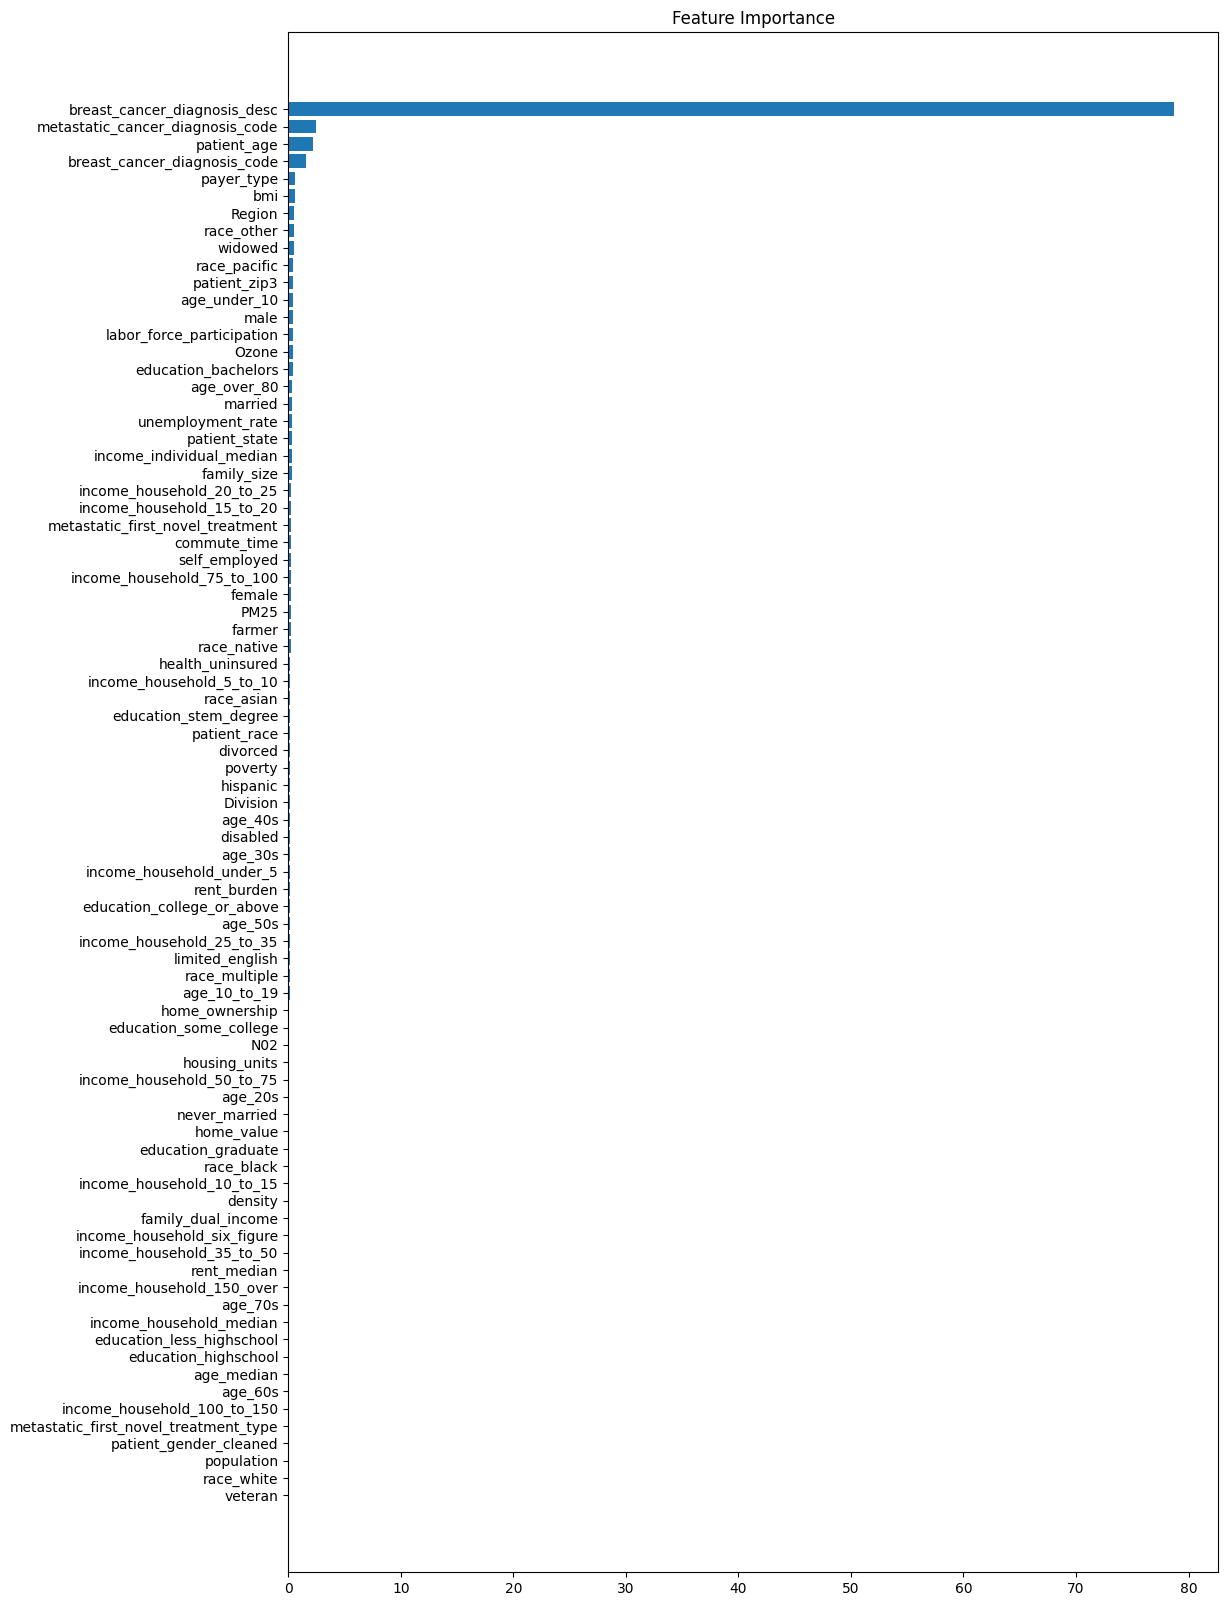

In [27]:
import numpy as np
import matplotlib.pyplot as plt
feature_importance = cat_model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 20))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test_filled.columns)[sorted_idx])
plt.title('Feature Importance')


In [31]:
df_res_test = X_test.copy()
df_res_test['y_pred'] = y_pred
df_res_test['y_true'] = y_test

df_res_test['accuracy'] = df_res_test['y_pred'] == df_res_test['y_true']
df_res_test.head()

,patient_id,patient_race,payer_type,patient_state,patient_zip3,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,metastatic_cancer_diagnosis_code,metastatic_first_novel_treatment,metastatic_first_novel_treatment_type,Region,Division,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,housing_units,home_value,rent_median,rent_burden,education_less_highschool,education_highschool,education_some_college,education_bachelors,education_graduate,education_college_or_above,education_stem_degree,labor_force_participation,unemployment_rate,self_employed,farmer,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D,y_pred,y_true,accuracy
11970,241293,NaN,COMMERCIAL,IL,605,51,F,NaN,C50919,Malignant neoplasm of unsp site of unspecified...,C773,NaN,NaN,Midwest,East North Central,18511.321430,782.646429,40.369643,12.830357,13.101786,10.857143,13.235714,12.910714,15.392857,11.835714,6.444643,3.382143,51.033929,48.966071,56.042857,9.898214,29.285714,4.760714,3.233818,58.841818,99988.01852,2.054545,1.116364,1.745455,2.160000,2.107273,5.161818,7.594545,17.076364,14.192727,20.567273,26.212727,46.780000,47189.43636,78.890909,6653.946429,300143.6923,1347.901961,27.781250,7.178571,24.328571,27.825000,24.555357,16.108929,40.664286,40.880357,67.121429,4.492857,12.413208,1.464151,79.142857,5.546429,6.035714,0.210714,0.010714,3.669643,5.380357,13.935714,8.660714,7.101786,2.507273,33.132075,5.412500,5.078571,36.974870,7.893858,21.718229,1,1,1,True
8868,612155,Black,MEDICAID,GA,300,56,F,NaN,C50211,Malig neoplm of upper-inner quadrant of right ...,C773,NaN,NaN,South,South Atlantic,40162.725810,875.119355,37.734426,13.421311,14.393443,12.029508,13.813115,14.032787,14.036066,10.106557,5.449180,2.726230,48.536066,51.463934,49.665574,12.496721,33.529508,4.313115,3.380984,57.214754,82017.54098,2.296721,1.567213,3.014754,3.300000,3.283607,7.906557,11.395082,16.332787,13.537705,17.293443,20.083607,37.377049,39698.46667,67.514754,14135.629030,276631.6949,1339.316667,31.643860,10.380328,21.544262,27.100000,24.840984,16.137705,40.978689,43.401667,67.077049,5.044262,16.516667,0.311667,49.021311,32.513115,7.944262,0.263934,0.073770,4.603279,5.578689,11.842623,10.270492,10.775410,4.304918,32.501667,13.040984,6.503279,40.968089,9.488443,19.108904,1,1,1,True
4659,945034,White,COMMERCIAL,OR,974,53,F,29.0,C50312,Malig neoplasm of lower-inner quadrant of left...,C7989,NaN,NaN,West,Pacific,7573.884615,100.082051,49.551316,8.605128,10.474359,10.224359,9.816667,10.525641,12.950000,18.552564,12.216667,6.634615,50.034615,49.965385,51.441026,15.062821,25.384615,8.110256,2.881316,39.459211,56858.01351,3.078205,2.271795,4.215385,6.379487,6.038462,10.671795,15.144872,18.924359,10.971795,13.637179,8.696154,22.333333,27739.06579,73.965385,3154.448718,280274.0769,958.107692,31.365574,8.744156,30.759740,39.651948,13.392208,7.457143,20.849351,46.381081,48.905128,7.998701,11.063514,3.082432,89.260256,0.394872,1.156410,1.397436,0.067949,1.900000,5.812821,5.938462,22.233333,15.133333,0.384615,25.986486,6.661538,11.862821,37.676078,4.211750,6.512334,1,1,1,True
8506,376741,Asian,NaN,CA,907,45,F,23.0,1749,"Malignant neoplasm of breast (female), unspeci...",C773,NaN,NaN,West,Pacific,28996.772730,2757.963636,40.640909,9.868182,15.304545,13.140909,12.181818,11.463636,14.150000,12.518182,7.136364,4.227273,47.

In [64]:
def get_res(df, col):
  cols = col + ['accuracy']
  df_grouped = df.groupby(cols, dropna=False).agg(
    num = ('patient_id', 'count'),
  ).reset_index()

  df_grouped['percentage'] = df_grouped['num'] /  df_grouped.groupby(col, dropna=False)['num'].transform('sum') * 100
  
  return df_grouped

In [65]:
get_res(df_res_test, ['payer_type'])

,payer_type,accuracy,num,percentage
0,COMMERCIAL,False,229,18.709150
1,COMMERCIAL,True,995,81.290850
2,MEDICAID,False,97,19.595960
3,MEDICAID,True,398,80.404040
4,MEDICARE ADVANTAGE,False,73,14.777328
5,MEDICARE ADVANTAGE,True,421,85.222672
6,NaN,False,73,19.783198
7,NaN,True,296,80.216802


In [46]:
get_res(df_res_test, 'patient_race')

,patient_race,accuracy,num,percentage
0,Asian,False,12,15.384615
1,Asian,True,66,84.615385
2,Black,False,37,19.270833
3,Black,True,155,80.729167
4,Hispanic,False,28,17.610063
5,Hispanic,True,131,82.389937
6,Other,False,30,20.408163
7,Other,True,117,79.591837
8,White,False,133,18.344828
9,White,True,592,81.655172


In [66]:
get_res(df_res_test, ['Division'])

,Division,accuracy,num,percentage
0,East North Central,False,91,15.635739
1,East North Central,True,491,84.364261
2,East South Central,False,21,19.626168
3,East South Central,True,86,80.373832
4,Middle Atlantic,False,51,16.612378
5,Middle Atlantic,True,256,83.387622
6,Mountain,False,36,17.733990
7,Mountain,True,167,82.266010
8,New England,True,1,100.000000
9,Pacific,False,109,20.073665


In [68]:
get_res(df_res_test, ['breast_cancer_diagnosis_code', 'breast_cancer_diagnosis_desc'])

,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,accuracy,num,percentage
0,1741,Malignant neoplasm of central portion of femal...,True,19,100.000000
1,1742,Malignant neoplasm of upper-inner quadrant of ...,False,6,46.153846
2,1742,Malignant neoplasm of upper-inner quadrant of ...,True,7,53.846154
3,1743,Malignant neoplasm of lower-inner quadrant of ...,False,1,25.000000
4,1743,Malignant neoplasm of lower-inner quadrant of ...,True,3,75.000000
5,1744,Malignant neoplasm of upper-outer quadrant of ...,False,3,3.614458
6,1744,Malignant neoplasm of upper-outer quadrant of ...,True,80,96.385542
7,1745,Malignant neoplasm of lower-outer quadrant of ...,False,2,13.333333
8,1745,Malignant neoplasm of lower-outer quadrant of ...,True,13,86.666667
9,1746,Malignant neoplasm of axillary tail of female ...,False,1,33.333333
